<h1>PCA - Principal Component Analysis</h1>

PCA ist eine Methode, um die Dimension von Features zu reduzieren. 

Die Anwendungen von PCA mit Sklearn ist einfach umzusetzen und erfordert nur wenige Schritte.

PCA kann in den normalen Workflow mit eingebaut werden, um die wichtigsten Features eines Datasets herauszufinden und den Rest zu eliminieren. <br>
Mit weniger Features ergibt sich eine bessere Übersicht und der Bedarf an der benötigten Rechenleistung für das Trainieren sinkt.


img:  Dataset mit vielen Features in ein Dataset mit weniger Features transformieren.

Ein Beispiel welches den Nutzen von PCA gut zeigt, ist das Klassizifieren von Zahlen.

In [25]:
# Imports
import pandas as pd
import numpy  as np

from sklearn.datasets import load_digits  # Sklearn Digit Dataset

from matplotlib import pyplot as plt      # Für Visualisierungen

In [5]:
# Lade Dataset
digits = load_digits()

In [8]:
# Zeige Keys des Datasets an.
digits.keys()

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])

Data:  Die Daten die für das Training benutzt werden. <br>
Target: Zuordnung der Daten zu den Zahlen die klassifiziert werden sollen.<br>
feature_names: Die Namen der Features.<br>
target_names: Die verschiedenen Klassen.

In [13]:
# 1797 Zeilen, 64 Spalten
digits.data.shape

(1797, 64)

In [15]:
# Der n-the Datenpunkt hat diese Features
digits.data[10]

array([ 0.,  0.,  1.,  9., 15., 11.,  0.,  0.,  0.,  0., 11., 16.,  8.,
       14.,  6.,  0.,  0.,  2., 16., 10.,  0.,  9.,  9.,  0.,  0.,  1.,
       16.,  4.,  0.,  8.,  8.,  0.,  0.,  4., 16.,  4.,  0.,  8.,  8.,
        0.,  0.,  1., 16.,  5.,  1., 11.,  3.,  0.,  0.,  0., 12., 12.,
       10., 10.,  0.,  0.,  0.,  0.,  1., 10., 13.,  3.,  0.,  0.])

In [17]:
digits.data[10].reshape(8,8)

array([[ 0.,  0.,  1.,  9., 15., 11.,  0.,  0.],
       [ 0.,  0., 11., 16.,  8., 14.,  6.,  0.],
       [ 0.,  2., 16., 10.,  0.,  9.,  9.,  0.],
       [ 0.,  1., 16.,  4.,  0.,  8.,  8.,  0.],
       [ 0.,  4., 16.,  4.,  0.,  8.,  8.,  0.],
       [ 0.,  1., 16.,  5.,  1., 11.,  3.,  0.],
       [ 0.,  0., 12., 12., 10., 10.,  0.,  0.],
       [ 0.,  0.,  1., 10., 13.,  3.,  0.,  0.]])

Das Dataset Digits von Sklearn hat 64 features (8x8). Die 8x8 Matrix zeigt grobe Bilder von Zahlen. <br>

Die Werte der Pixel ligen dabei im Bereich von 0 bis 16 (0 = Schwarz)

Mit Matplotlib können die Daten visualisiert werden.

<Figure size 640x480 with 0 Axes>

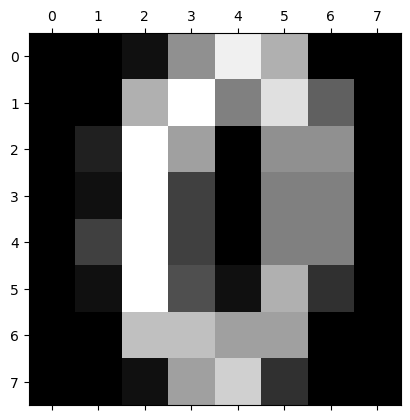

In [22]:
%matplotlib inline

plt.gray()
plt.matshow(digits.data[10].reshape(8,8))

In [23]:
# Was ist der 10the Eintrag?
digits.target[10]

0

Um weitere möglichkeiten zu haben, und um zu trainieren, werden die Daten in ein Dataframe von Pandas überführt. 

In [45]:
training_set = pd.DataFrame(digits.data, columns=digits.feature_names)
training_set.head(3)

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_6,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0


In [46]:
# Damit wird der Tabelle noch eine Spalte hinzugefügt, um die Klasse zu sehen.
target_column = pd.DataFrame(digits.target, columns=['number'])

In [47]:
training_set  = pd.concat([training_set, target_column], axis="columns")
training_set.head(3)

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7,number
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0,0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0,1
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0,2


In [48]:
# Allgemeine Beschreibung
training_set.describe()

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7,number
count,1797.0,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,...,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000
mean,0.0,0.303840,5.204786,11.835838,11.848080,5.781859,1.362270,0.129661,0.005565,1.993879,...,0.206455,0.000556,0.279354,5.557596,12.089037,11.809126,6.764051,2.067891,0.364496,4.490818
std,0.0,0.907192,4.754826,4.248842,4.287388,5.666418,3.325775,1.037383,0.094222,3.196160,...,0.984401,0.023590,0.934302,5.103019,4.374694,4.933947,5.900623,4.090548,1.860122,2.865304
min,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.0,0.000000,1.000000,10.000000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,11.000000,10.000000,0.000000,0.000000,0.000000,2.000000
50%,0.0,0.000000,4.000000,13.000000,13.000000,4.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,4.000000,13.000000,14.000000,6.000000,0.000000,0.000000,4.000000
75%,0.0,0.000000,9.000000,15.000000,15.000000,11.000000,0.000000,0.000000,0.000000,3.000000,...,0.000000,0.000000,0.000000,10.000000,16.000000,16.000000,12.000000,2.000000,0.000000,7.000000
max,0.0,8.000000,16.000000,16.000000,16.000000,16.000000,16.000000,15.000000,2.000000,16.000000,...,13.000000,1.000000,9.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000,9.000000


Als Menschen können wir sehen, das nicht alle Pixel relevant sind, um die dargestelle Zahl zu erkennen. Dasselbe gilt auch für andere Daten die man recht gut überblicken kann.

Bei Daten mit wenigen Features können diese einfach entfernt werden. Bei Datasets mit über 30 Features und mehr wird es schon schwiriger => PCA, um die wichtigsten Features zu identifizieren.

Durch .describe() ist sichtbar welche der Pixel eher verwendet werden, um die Zahlen darzustellen. 

In [ ]:
from sklearn.model_selection import train_test_split # Teile Dataset auf in Train- und Testset
from sklearn.decomposition   import PCA              # Sklearn PCA
from sklearn.preprocessing   import StandardScaler   # Um die Daten zu skalieren 

>i
